# RNN

## Imports

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import regularizers, optimizers
from keras import regularizers

import matplotlib.pyplot as plt

## Load

In [2]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Preencher valores ausentes com uma string vazia
df_train['lyrics'] = df_train['lyrics'].fillna('')
df_test['lyrics'] = df_test['lyrics'].fillna('')

# Continuar com o código de pré-processamento
X_train = df_train['lyrics'].values
y_train = df_train['sentiment'].values

X_test = df_test['lyrics'].values
y_test = df_test['sentiment'].values

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Loading data...
X_train shape: (36212, 500)
y_train shape: (36212,)
X_test shape: (15520, 500)
y_test shape: (15520,)


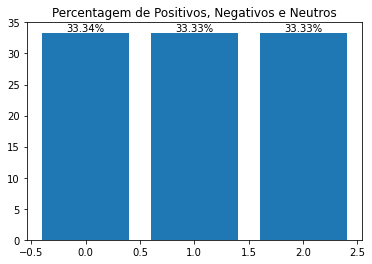

In [3]:
import matplotlib.pyplot as plt

# Calcular a contagem de cada categoria
contagem = df_test['sentiment'].value_counts()

# Calcular as porcentagens
porcentagens = contagem / contagem.sum() * 100

# Criar o gráfico de colunas
plt.bar(porcentagens.index, porcentagens)

# Adicionar rótulos aos valores nas colunas
for i, valor in enumerate(porcentagens):
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom')

# Adicionar título ao gráfico
plt.title('Percentagem de Positivos, Negativos e Neutros')

# Exibir o gráfico
plt.show()

In [4]:
print("The output categories are", np.unique(y_train))
print("The number of unique words is", len(np.unique(np.hstack(X_test))))

The output categories are [0 1 2]
The number of unique words is 9802


## Define model

In [4]:
#model = Sequential()
#model.add(Embedding(max_features, 32))
#model.add(SimpleRNN(32))
#model.add(Dense(3, activation='softmax'))
#model.summary()


# Estamos a usar este
#model = Sequential()
#model.add(Embedding(max_features, 32, embeddings_regularizer=regularizers.l2(0.01)))  # Adiciona regularização L2
#model.add(SimpleRNN(32))
#model.add(Dense(3, activation='softmax'))
#model.summary()

# SimpleRNN(32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 322,179
Trainable params: 322,179
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
227/227 [==============================] - 13s 54ms/step - loss: 1.0611 - acc: 0.4302 - val_loss: 1.0486 - val_acc: 0.4461
Epoch 2/25
227/227 [==============================] - 12s 54ms/step - loss: 0.9525 - acc: 0.5438 - val_loss: 1.0698 - val_acc: 0.4332
Epoch 3/25
227/227 [==========================

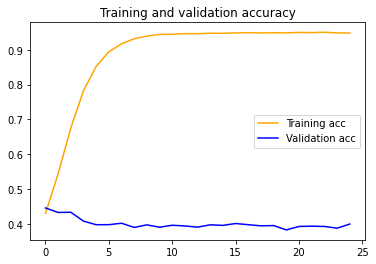

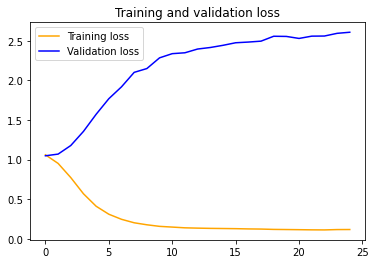

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='softmax'))
model.summary()


optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.2)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## SimpleRNN (64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 648,451
Trainable params: 648,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
227/227 [==============================] - 17s 72ms/step - loss: 1.0851 - acc: 0.3818 - val_loss: 1.0665 - val_acc: 0.4214
Epoch 2/25
227/227 [==============================] - 16s 69ms/step - loss: 0.9272 - acc: 0.5606 - val_loss: 1.1060 - val_acc: 0.4219
Epoch 3/25
227/227 [========================

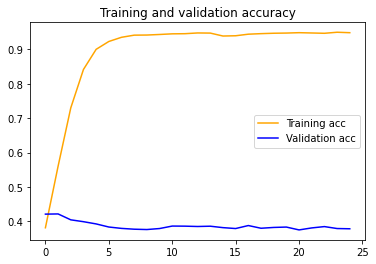

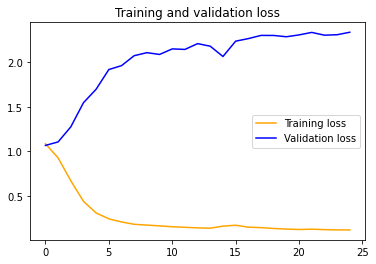

In [6]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64))
model.add(Dense(3, activation='softmax'))
model.summary()


optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.2)~


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## SimplesRNN(32) com Dropout(0.5) e regularização L2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 322,179
Trainable params: 322,179
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
227/227 [==============================] - 13s 55ms/step - loss: 1.2271 - acc: 0.3501 - val_loss: 1.1283 - val_acc: 0.3406
Epoch 2/25
227/227 [==========================

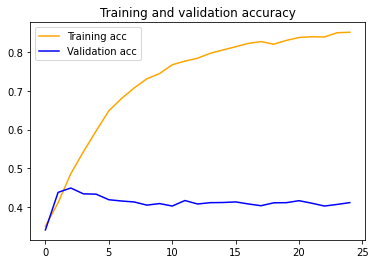

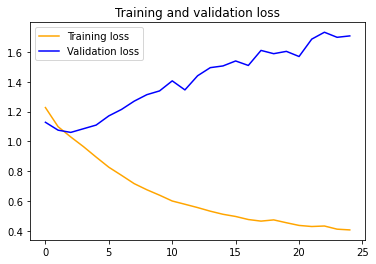

In [7]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
model.summary()

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.2)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM com Dropout(0.8) e regularização L2

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_1 (Dropout)         (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 402,819
Trainable params: 402,819
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
227/227 [==============================] - 81s 353ms/step - loss: 1.5384 - acc: 0.3420 - val_loss: 1.4062 - val_acc: 0.3558
Epoch 2/15
227/227 [=========================

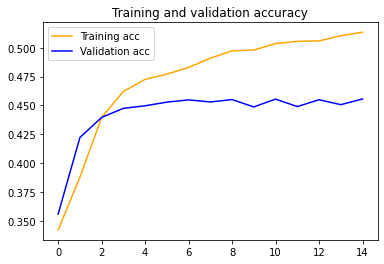

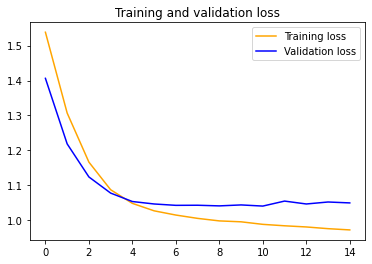

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.8))
model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
model.summary()

optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
model.summary()

optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, None, 128)         82432     
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 534,403
Trainable params: 534,403
Non-trai

: 

: 